In [5]:
using Revise
using DiffusionModels
using Interpolations
using Images
using TestImages

includet("plotting.jl")

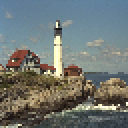

In [6]:
img = testimage("lighthouse")
img = imresize(img, (64, 64))

In [7]:
img_array = channelview(img);
img_array = permutedims(img_array, (2,3,1));
img_array = @. img_array * 2 - 1;

In [40]:
# noise_schedule = LinearSchedule()
noise_schedule = CosineSchedule()
frequency_schedule = FrequencySchedule(schedule=CosineSchedule(), sigma_max_blur=10.0, img_dim=64)
diffusion = BlurringDiffusion(noise_schedule, frequency_schedule)

BlurringDiffusion{2, Nothing}(CosineSchedule(0.0, 1.0, 1.0, 1.0e-9), FrequencySchedule(CosineSchedule(0.0, 1.0, 1.0, 1.0e-9), 10.0, 64, 0.001), (1, 2), nothing)

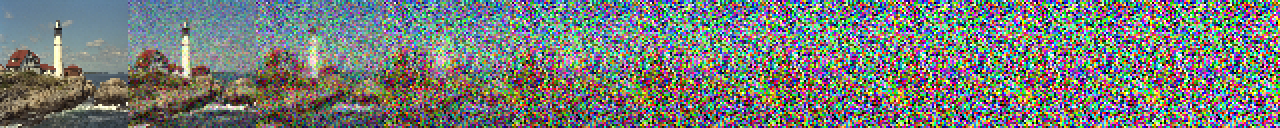

In [41]:
img_out = plot_diffusion_marginal(diffusion, img_array)
imresize(img_out, ratio=2, method=Constant())